### Predict the likelihood of a customer giving a positive response to the Gold Membership offer using Machine Learning

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [111]:
sf = pd.read_csv("resp_data.csv")
sf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [112]:
train, test = train_test_split(sf, test_size=0.2, random_state=123)

In [113]:
print(sf.shape)
print(train.shape)
print(test.shape)

(2240, 22)
(1792, 22)
(448, 22)


In [114]:
#A1
train.reset_index(drop=True, inplace=True)

In [115]:
train.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,2115,1957,Graduation,Together,50116.0,1,1,6/20/2014,68,54,0,10,0,0,2,2,1,0,4,5,0,0
1,7723,1979,Graduation,Together,75507.0,0,0,2/5/2014,56,709,93,374,104,80,80,1,8,6,6,3,0,0
2,5959,1968,Graduation,Single,35893.0,1,1,10/15/2012,80,158,0,23,0,0,18,6,3,1,5,8,0,0
3,9860,1959,Graduation,Together,44911.0,0,1,3/15/2013,11,159,0,22,2,1,31,3,4,1,4,7,0,0
4,850,1968,Graduation,Single,70566.0,0,1,6/10/2013,4,381,28,215,84,28,21,2,6,5,9,3,0,0


In [116]:
train.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [117]:
train.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 18
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [118]:
train["Income"].mean()

52428.38105975197

In [119]:
#A2
train["Income"].fillna(52428.3,inplace=True )

In [120]:
train.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [121]:
train.duplicated().sum()

0

In [122]:
def drop_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [123]:
train.shape

(1792, 22)

In [124]:
#A3
train = drop_outlier(train, "Income")

In [125]:
train.shape

(1785, 22)

In [126]:
#A4
train.drop(["Id"],axis=1, inplace=True)

In [127]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1957,Graduation,Together,50116.0,1,1,6/20/2014,68,54,0,10,0,0,2,2,1,0,4,5,0,0
1,1979,Graduation,Together,75507.0,0,0,2/5/2014,56,709,93,374,104,80,80,1,8,6,6,3,0,0
2,1968,Graduation,Single,35893.0,1,1,10/15/2012,80,158,0,23,0,0,18,6,3,1,5,8,0,0
3,1959,Graduation,Together,44911.0,0,1,3/15/2013,11,159,0,22,2,1,31,3,4,1,4,7,0,0
4,1968,Graduation,Single,70566.0,0,1,6/10/2013,4,381,28,215,84,28,21,2,6,5,9,3,0,0


In [128]:
#A5
#Splitting our train dataset into features and target
target = "Response"
X_train = train.drop(target, axis=1) #features
y_train = train[target] #Target

### Feature Engineering

In [129]:
train.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [130]:
#A6
X_train["Dt_Customer"] = pd.to_datetime(X_train["Dt_Customer"], infer_datetime_format=True)

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1341/1911166805.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  X_train["Dt_Customer"] = pd.to_datetime(X_train["Dt_Customer"], infer_datetime_format=True)


In [131]:
#A7 To generate the days,month,year columns
X_train["Day_Week"] = X_train["Dt_Customer"].dt.dayofweek
X_train["Month"] = X_train["Dt_Customer"].dt.month
X_train["Year"] = X_train["Dt_Customer"].dt.year

In [132]:
X_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Day_Week,Month,Year
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,68,54,0,10,0,0,2,2,1,0,4,5,0,4,6,2014
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,56,709,93,374,104,80,80,1,8,6,6,3,0,2,2,2014
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,80,158,0,23,0,0,18,6,3,1,5,8,0,0,10,2012
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,11,159,0,22,2,1,31,3,4,1,4,7,0,4,3,2013
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,4,381,28,215,84,28,21,2,6,5,9,3,0,0,6,2013


In [133]:
from datetime import datetime

In [134]:
#A8
yr = datetime.now().year
X_train["Age"] = yr - X_train["Year_Birth"]

In [135]:
X_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Day_Week,Month,Year,Age
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,68,54,0,10,0,0,2,2,1,0,4,5,0,4,6,2014,67
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,56,709,93,374,104,80,80,1,8,6,6,3,0,2,2,2014,45
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,80,158,0,23,0,0,18,6,3,1,5,8,0,0,10,2012,56
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,11,159,0,22,2,1,31,3,4,1,4,7,0,4,3,2013,65
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,4,381,28,215,84,28,21,2,6,5,9,3,0,0,6,2013,56


In [136]:
#A9
X_train.drop(["Year_Birth", "Dt_Customer"], axis=1,inplace=True)

In [137]:
X_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Day_Week,Month,Year,Age
0,Graduation,Together,50116.0,1,1,68,54,0,10,0,0,2,2,1,0,4,5,0,4,6,2014,67
1,Graduation,Together,75507.0,0,0,56,709,93,374,104,80,80,1,8,6,6,3,0,2,2,2014,45
2,Graduation,Single,35893.0,1,1,80,158,0,23,0,0,18,6,3,1,5,8,0,0,10,2012,56
3,Graduation,Together,44911.0,0,1,11,159,0,22,2,1,31,3,4,1,4,7,0,4,3,2013,65
4,Graduation,Single,70566.0,0,1,4,381,28,215,84,28,21,2,6,5,9,3,0,0,6,2013,56


In [138]:
cat_feat = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat_feat.append(i)
    
num_feat = []
for i in X_train.columns:
    if X_train[i].dtype == 'int64' or X_train[i].dtype == 'float64':
        num_feat.append(i)

In [139]:
for i in cat_feat:
    if X_train[i].dtype == 'O':
        print(f"{i} has {X_train[i].nunique()} classes\nThey are:\n{X_train[i].unique()}\n") 

Education has 5 classes
They are:
['Graduation' 'PhD' '2n Cycle' 'Basic' 'Master']

Marital_Status has 7 classes
They are:
['Together' 'Single' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd']



In [140]:
#A10
p=np.array(X_train['Marital_Status'])
p=p.reshape(-1,1)

In [141]:
cat_feat

['Education', 'Marital_Status']

In [142]:
cat_feat[0]

'Education'

In [143]:
Ordinal_col = X_train[cat_feat[0]].to_frame()

In [144]:
Ordinal_col

,Education
0,Graduation
1,Graduation
2,Graduation
3,Graduation
4,Graduation
...,...
1787,Graduation
1788,Graduation
1789,Graduation
1790,Graduation


In [145]:
num_feat

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Age']

In [146]:
X_train[num_feat]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
0,50116.0,1,1,68,54,0,10,0,0,2,2,1,0,4,5,0,67
1,75507.0,0,0,56,709,93,374,104,80,80,1,8,6,6,3,0,45
2,35893.0,1,1,80,158,0,23,0,0,18,6,3,1,5,8,0,56
3,44911.0,0,1,11,159,0,22,2,1,31,3,4,1,4,7,0,65
4,70566.0,0,1,4,381,28,215,84,28,21,2,6,5,9,3,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,34738.0,1,0,51,3,2,10,3,0,2,1,1,0,3,6,0,40
1788,68655.0,0,0,95,456,19,832,75,118,38,1,4,5,11,3,0,36
1789,60230.0,0,1,78,520,20,367,39,81,40,2,6,3,6,5,0,68
1790,69142.0,0,1,50,448,4,34,6,4,39,3,8,1,7,5,0,72


In [147]:
#A11
scaler = MinMaxScaler()
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

### Multicollinearity

<Axes: >

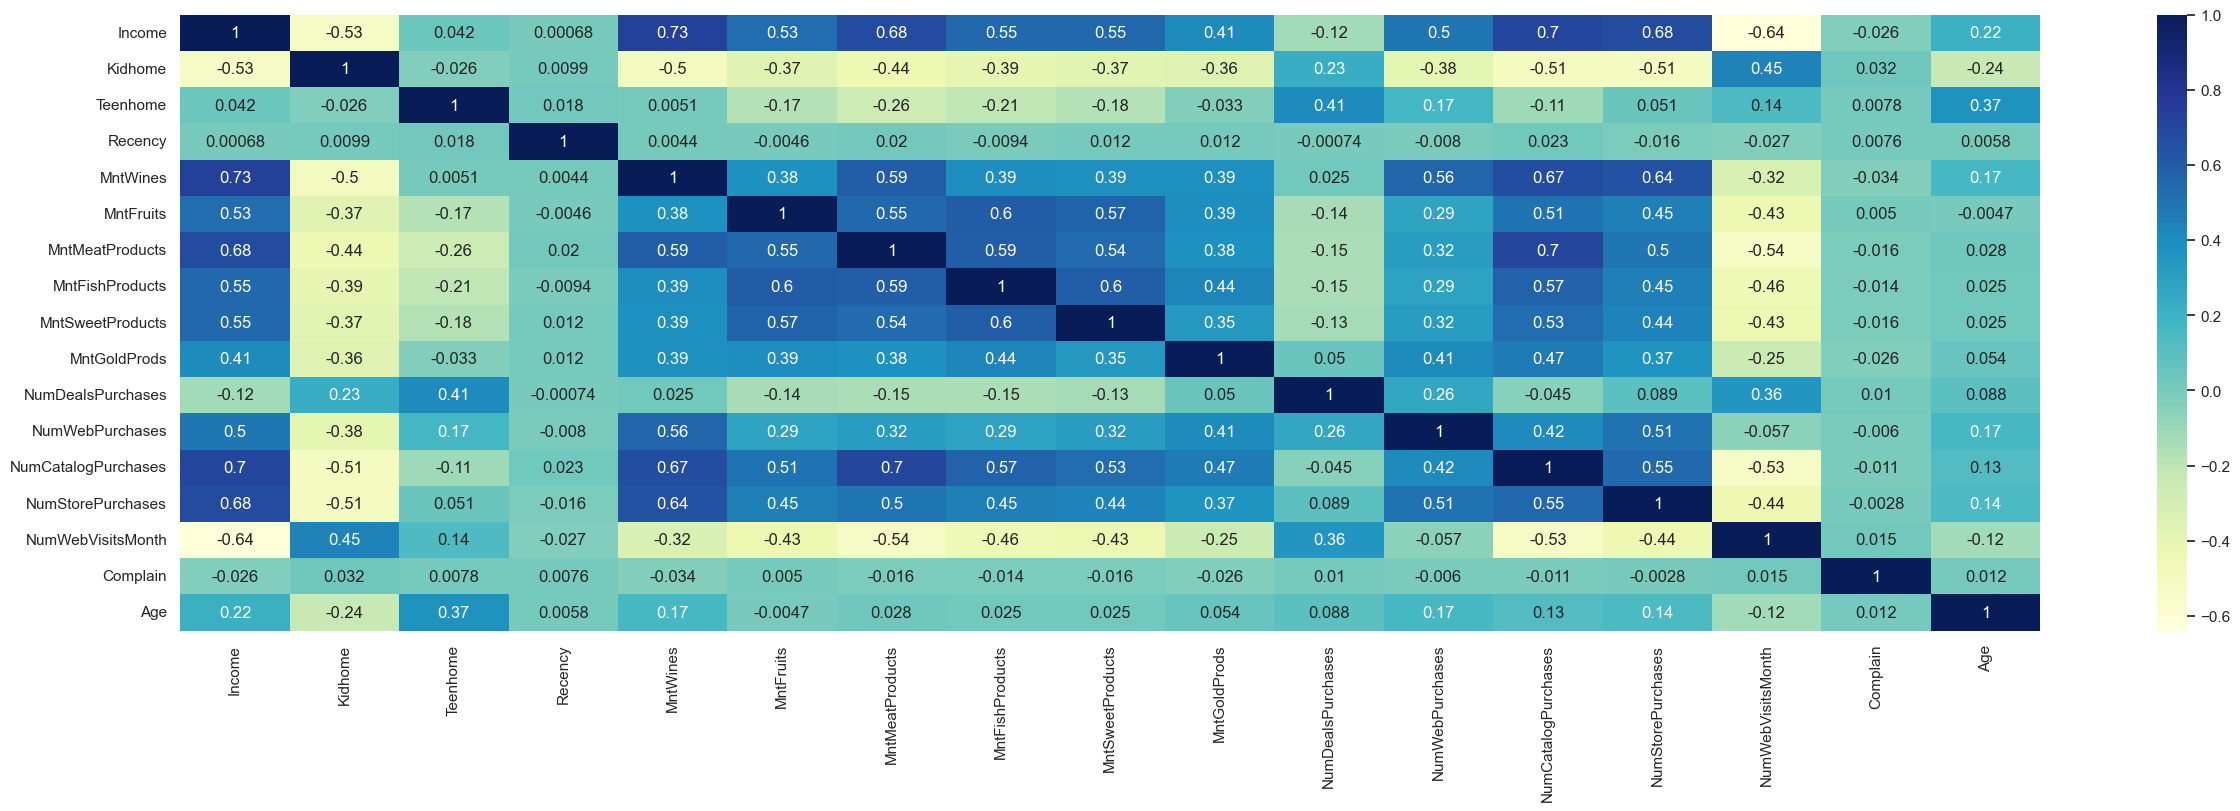

In [148]:
plt.figure(figsize=(30,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

In [149]:
#A12
use=('Graduation', 'PhD', '2n Cycle', 'Basic', 'Master')

# define ordinal encoding
encoder = OrdinalEncoder(categories=[use])

# transform data
result= encoder.fit_transform(Ordinal_col)
print(result)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [4.]]


/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

In [150]:
#A13
X_train['Education']=result

In [151]:
X_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Day_Week,Month,Year,Age
0,0.0,Together,0.432002,0.5,0.5,0.686869,0.036169,0.000000,0.005797,0.000000,0.000000,0.006231,0.133333,0.037037,0.000000,0.307692,0.25,0.0,4,6,2014,0.378641
1,0.0,Together,0.658700,0.0,0.0,0.565657,0.474883,0.467337,0.216812,0.401544,0.305344,0.249221,0.066667,0.296296,0.214286,0.461538,0.15,0.0,2,2,2014,0.165049
2,0.0,Single,0.305016,0.5,0.5,0.808081,0.105827,0.000000,0.013333,0.000000,0.000000,0.056075,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0,10,2012,0.271845
3,0.0,Together,0.385531,0.0,0.5,0.111111,0.106497,0.000000,0.012754,0.007722,0.003817,0.096573,0.200000,0.148148,0.035714,0.307692,0.35,0.0,4,3,2013,0.359223
4,0.0,Single,0.614585,0.0,0.5,0.040404,0.255191,0.140704,0.124638,0.324324,0.106870,0.065421,0.133333,0.222222,0.178571,0.692308,0.15,0.0,0,6,2013,0.271845


In [152]:
#A14
encoded_data = pd.get_dummies(X_train[cat_feat[1]]).astype(int)
encoded_data


,Absurd,Alone,Divorced,Married,Single,Together,Widow
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1787,0,0,0,0,1,0,0
1788,0,0,0,0,1,0,0
1789,0,0,0,0,1,0,0
1790,0,0,1,0,0,0,0


In [153]:
#A15
X_train_n=pd.concat([X_train, pd.get_dummies(encoded_data, prefix='Marital_Status')],axis=1)
X_train_n

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Day_Week,Month,Year,Age,Absurd,Alone,Divorced,Married,Single,Together,Widow
0,0.0,Together,0.432002,0.5,0.5,0.686869,0.036169,0.000000,0.005797,0.000000,0.000000,0.006231,0.133333,0.037037,0.000000,0.307692,0.25,0.0,4,6,2014,0.378641,0,0,0,0,0,1,0
1,0.0,Together,0.658700,0.0,0.0,0.565657,0.474883,0.467337,0.216812,0.401544,0.305344,0.249221,0.066667,0.296296,0.214286,0.461538,0.15,0.0,2,2,2014,0.165049,0,0,0,0,0,1,0
2,0.0,Single,0.305016,0.5,0.5,0.808081,0.105827,0.000000,0.013333,0.000000,0.000000,0.056075,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0,10,2012,0.271845,0,0,0,0,1,0,0
3,0.0,Together,0.385531,0.0,0.5,0.111111,0.106497,0.000000,0.012754,0.007722,0.003817,0.096573,0.200000,0.148148,0.035714,0.307692,0.35,0.0,4,3,2013,0.359223,0,0,0,0,0,1,0
4,0.0,Single,0.614585,0.0,0.5,0.040404,0.255191,0.140704,0.124638,0.324324,0.106870,0.065421,0.133333,0.222222,0.178571,0.692308,0.15,0.0,0,6,2013,0.271845,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,Single,0.294704,0.5,0.0,0.515152,0.002009,0.010050,0.005797,0.011583,0.000000,0.006231,0.066667,0.037037,0.000000,0.230769,0.30,0.0,2,11,2014,0.116505,0,0,0,0,1,0,0
1788,0.0,Single,0.597523,0.0,0.0,0.959596,0.305425,0.095477,0.482319,0.289575,0.450382,0.118380,0.066667,0.148148,0.178571,0.846154,0.15,0.0,0,10,2012,0.077670,0,0,0,0,1,0,0
1789,0.0,Single,0.522303,0.0,0.5,0.787879,0.348292,0.100503,0.212754,0.150579,0.309160,0.124611,0.133333,0.222222,0.107143,0.461538,0.25,0.0,0,5,2013,0.388350,0,0,0,0,1,0,0
1790,0.0,Divorced,0.601871,0.0,0.5,0.505051,0.300067,0.020101,0.019710,0.023166,0.015267,0.121495,0.200000,0.296296,0.035714,0.538462,0.25,0.0,6,6,2014,0.427184,0,0,1,0,0,0,0


In [154]:
#A16
X_train_n.drop(["Marital_Status"], axis=1,inplace=True)

### Feature Importance

In [155]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train_n, y_train)
predictors = X_train_n.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,0
Income,0.186190
Recency,0.111483
MntWines,0.109868
Age,0.061609
MntGoldProds,0.056956
NumWebVisitsMonth,0.056818
MntMeatProducts,0.054525
NumCatalogPurchases,0.053494
NumStorePurchases,0.044453
Year,0.036180


In [156]:
res = coef.to_frame()
res.head(10).index

Index(['Income', 'Recency', 'MntWines', 'Age', 'MntGoldProds',
       'NumWebVisitsMonth', 'MntMeatProducts', 'NumCatalogPurchases',
       'NumStorePurchases', 'Year'],
      dtype='object')

In [157]:
Top_10 = ['Income', 'MntWines', 'Recency', 'Age', 'MntMeatProducts',
       'NumCatalogPurchases', 'NumWebVisitsMonth', 'NumStorePurchases',
       'MntGoldProds', 'Year']

In [158]:
#A17
X_train_n1 = X_train_n[Top_10]

In [159]:
X_train_n1.shape

(1785, 10)

In [162]:
def prepare(d):
    d.reset_index(drop=True, inplace=True)

    d["Income"].fillna(52428.3,inplace=True )

    d = drop_outlier(d, "Income")

    d.drop(["Id"],axis=1, inplace=True)

    target = "Response"
    X_d = d.drop(target, axis=1) #features
    y_d =d[target] #Target

    X_d["Dt_Customer"] = pd.to_datetime(X_d["Dt_Customer"], infer_datetime_format=True)

    X_d["Day_Week"] = X_d["Dt_Customer"].dt.dayofweek
    X_d["Month"] = X_d["Dt_Customer"].dt.month
    X_d["Year"] = X_d["Dt_Customer"].dt.year

    yr = datetime.now().year
    X_d["Age"] = yr - X_d["Year_Birth"]

    X_d.drop(["Year_Birth", "Dt_Customer"], axis=1,inplace=True)

    scaler = MinMaxScaler()
    X_d[num_feat] = scaler.fit_transform(X_d[num_feat])

    Ordinal_col = X_d[cat_feat[0]].to_frame()
    
    use=('Graduation', 'PhD', '2n Cycle', 'Basic', 'Master')

    # define ordinal encoding
    encoder = OrdinalEncoder(categories=[use])

    # transform data
    result= encoder.fit_transform(Ordinal_col)
    print(result)

    X_d['Education']=result

    encoded_data = pd.get_dummies(X_d[cat_feat[1]]).astype(int)

    X_d_n=pd.concat([X_d, pd.get_dummies(encoded_data, prefix='Marital_Status')],axis=1)

    X_d_n.drop(["Marital_Status"], axis=1,inplace=True)

    X_d_n1 = X_d_n[Top_10]

    return X_d_n1, y_d

In [163]:
X_test,y_test = prepare(test)

[[4.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [4.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [2.]
 [4.]
 [0.]
 [3.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [4.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [4.]
 [0.]
 [3.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [4.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [4.]
 [0.]
 [0.]
 [0.]
 [2.]
 [4.]
 [4.]
 [4.]
 [0.]
 [4.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [4.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [4.]
 [0.]
 [4.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [2.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [4.]
 [4.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [1.]
 [4.]
 [0.]
 [4.]
 [4.]
 [3.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [4.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [4.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1341/3327233814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(["Id"],axis=1, inplace=True)
/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1341/3327233814.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  X_d["Dt_Customer"] = pd.to_datetime(X_d["Dt_Customer"], infer_datetime_format=True)
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
 

In [164]:
X_test.head()

,Income,MntWines,Recency,Age,MntMeatProducts,NumCatalogPurchases,NumWebVisitsMonth,NumStorePurchases,MntGoldProds,Year
0,0.783396,0.995979,0.606061,0.206186,0.281059,0.363636,0.30,0.769231,0.511050,2012
1,0.312372,0.019437,0.636364,0.288660,0.032587,0.000000,0.45,0.230769,0.011050,2012
2,0.585633,0.209786,0.393939,0.422680,0.045825,0.363636,0.30,0.230769,0.530387,2012
3,0.006937,0.004021,0.595960,0.206186,0.009165,0.000000,0.40,0.230769,0.044199,2012
4,0.330930,0.050938,0.171717,0.185567,0.029532,0.090909,0.35,0.230769,0.074586,2012


In [165]:
y_train.value_counts()

Response
0    1512
1     273
Name: count, dtype: int64

### Optimization by balancing

In [166]:
#pip install imblearn

In [167]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [168]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train_n1,y_train)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

In [169]:
y_ros.value_counts()

Response
0    1512
1    1512
Name: count, dtype: int64

In [170]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d'

 )
    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    roc_curve(y_test, y_pred_prob)
    plt.show()               

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi


 Accuracy Score : 
  0.7785234899328859

 AUC Score : 
 0.623502930434044

 Confusion Matrix : 
  [[323  63]
 [ 36  25]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       386
           1       0.28      0.41      0.34        61

    accuracy                           0.78       447
   macro avg       0.59      0.62      0.60       447
weighted avg       0.82      0.78      0.79       447


 ROC curve : 



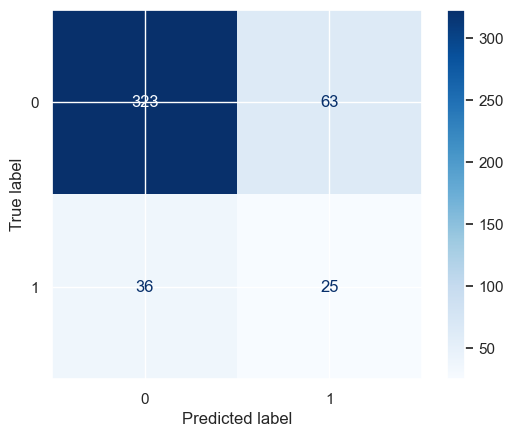

In [171]:
model1 = model_to_use("DT")
model1.fit(X_ros, y_ros)
performance(model1,X_ros,y_ros,X_test, y_test)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi


 Accuracy Score : 
  0.668903803131991

 AUC Score : 
 0.7956765480336362

 Confusion Matrix : 
  [[251 135]
 [ 13  48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.65      0.77       386
           1       0.26      0.79      0.39        61

    accuracy                           0.67       447
   macro avg       0.61      0.72      0.58       447
weighted avg       0.86      0.67      0.72       447


 ROC curve : 



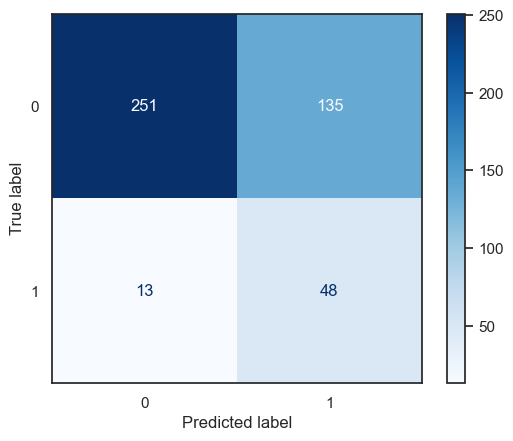

In [172]:
model2 = model_to_use("LR")
model2.fit(X_ros, y_ros)
performance(model2,X_ros,y_ros,X_test, y_test)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi


 Accuracy Score : 
  0.8076062639821029

 AUC Score : 
 0.8255329992355389

 Confusion Matrix : 
  [[327  59]
 [ 27  34]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       386
           1       0.37      0.56      0.44        61

    accuracy                           0.81       447
   macro avg       0.64      0.70      0.66       447
weighted avg       0.85      0.81      0.82       447


 ROC curve : 



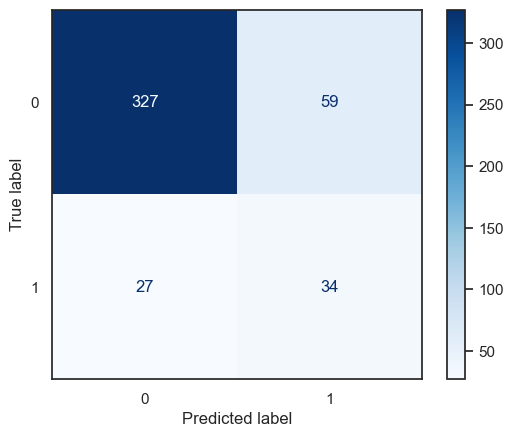

In [173]:
model3 = model_to_use("RF")
model3.fit(X_ros, y_ros)
performance(model3,X_ros,y_ros,X_test, y_test)

/Users/datalab/.local/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/datalab/.local/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/datalab/.local/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/datalab/.local/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_cate


 Accuracy Score : 
  0.767337807606264

 AUC Score : 
 0.8005606047736347

 Confusion Matrix : 
  [[306  80]
 [ 24  37]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       386
           1       0.32      0.61      0.42        61

    accuracy                           0.77       447
   macro avg       0.62      0.70      0.64       447
weighted avg       0.84      0.77      0.79       447


 ROC curve : 



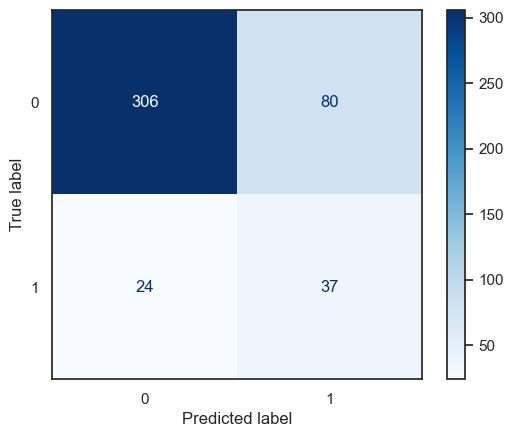

In [174]:
model4 = model_to_use("XGBC")
model4.fit(X_ros, y_ros)
performance(model4,X_ros,y_ros,X_test, y_test)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi


 Accuracy Score : 
  0.7114093959731543

 AUC Score : 
 0.788732693451117

 Confusion Matrix : 
  [[269 117]
 [ 12  49]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       386
           1       0.30      0.80      0.43        61

    accuracy                           0.71       447
   macro avg       0.63      0.75      0.62       447
weighted avg       0.87      0.71      0.76       447


 ROC curve : 



/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

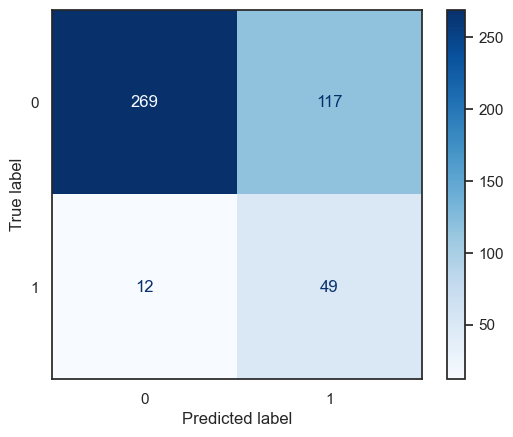

In [175]:
model5 = model_to_use("KNN")
model5.fit(X_ros, y_ros)
performance(model5,X_ros,y_ros,X_test, y_test)